In [2]:
'''
Random Forest applied to all of the selected taxa after filtering
Relative importance of each of the features is obtained

@Deb
'''

'\nRandom Forest applied to all of the selected taxa after filtering\nRelative importance of each of the features is obtained\n\n@Deb\n'

In [3]:
import pandas as pd


df_msm = pd.read_csv('../../data/msm_tt_rel_abundance_all.csv')
df_msm.shape


(43, 41)

In [4]:
df_msw = pd.read_csv('../../data/msw_tt_rel_abundance_all.csv')
df_msw.columns

Index(['d5__lactobacillus', 'd5__corynebacterium1', 'd5__gardnerella',
       'd5__sneathia', 'd5__staphylococcus', 'd5__anaerococcus',
       'd5__streptococcus', 'd5__finegoldia', 'd5__peptoniphilus',
       'd5__prevotella', 'd5__veillonella', 'd5__atopobium', 'd5__ezakiella',
       'd4__prevotellaceaeother', 'd5__megasphaera', 'd5__fastidiosipila',
       'd5__ralstonia', 'd5__corynebacterium', 'd5__granulicatella',
       'd5__porphyromonas', 'd5__dialister', 'd5__shuttleworthia',
       'd4__bifidobacteriaceaeother', 'd5__mycoplasma', 'd5__ureaplasma',
       'd5__escherichiashigella', 'd5__aerococcus',
       'd4__corynebacteriaceaeother', 'd5__parvimonas', 'd5__fusobacterium',
       'd5__gemella', 'd5__prevotella6', 'd5__brevibacterium',
       'd4__familyxiother', 'd5__campylobacter', 'd5__peptostreptococcus',
       'd5__neisseria', 'd5__acinetobacter', 'd5__facklamia', 'd5__chlamydia',
       'd5__treponema2'],
      dtype='object')

In [5]:
## add a column of status for msm and msw
import numpy as np

a = np.zeros(43)
b = np.ones(43)

df_msm['status'] = a
df_msw['status'] = b

In [8]:
## merge the dataframes using the columns and shuffle it

merged_df = pd.concat([df_msm,df_msw],axis=0,ignore_index=True)

merged_df
merged_df = merged_df.sample(frac=1)
merged_df = merged_df.fillna(0)

C:\Miniconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
## split data into training and testing parts
y = merged_df['status']
X = merged_df.drop(['status'],axis=1)

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)


0.7931034482758621


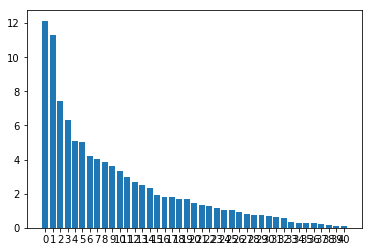

{'d5__gemella': 12.139492511934506,
 'd5__parvimonas': 11.330348004429695,
 'd5__lactobacillus': 7.422389732242715,
 'd5__peptoniphilus': 6.312551709614307,
 'd5__facklamia': 5.099793265593485,
 'd5__veillonella': 5.001896348566647,
 'd5__mycoplasma': 4.20166171759298,
 'd5__shuttleworthia': 4.018102165244659,
 'd5__ralstonia': 3.8296332700166644,
 'd5__escherichiashigella': 3.603982189636911,
 'd5__megasphaera': 3.339359870375358,
 'd5__fusobacterium': 2.9620214562505396,
 'd5__campylobacter': 2.71103956100141,
 'd5__dialister': 2.500467762203803,
 'd5__prevotella6': 2.348822563341139,
 'd5__sneathia': 1.8957382309768165,
 'd5__fastidiosipila': 1.8267878455512836,
 'd5__porphyromonas': 1.791943241052351,
 'd4__bifidobacteriaceaeother': 1.6927051553330381,
 'd5__peptostreptococcus': 1.6621490603208517,
 'd5__staphylococcus': 1.4807836631687699,
 'd5__atopobium': 1.3631996118637213,
 'd5__anaerococcus': 1.250020929878029,
 'd5__neisseria': 1.16596889735703,
 'd5__aerococcus': 1.02910289

In [45]:
### random forest and feature importance

from sklearn.ensemble import RandomForestClassifier
import collections


rand_for = RandomForestClassifier(n_estimators = 200,max_depth=2, random_state=0)

rand_for.fit(x_train,y_train)
#scores = cross_val_score(rand_for,X,y,cv=5)
#print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
# # print(rand_for.feature_importances_)

print(rand_for.score(x_test,y_test))
feat_imp = rand_for.feature_importances_*100
feat = x_train.columns

dict_feat_imp = dict(zip(feat,feat_imp))
sorted_feat_imp = dict(sorted(dict_feat_imp.items(), key = lambda kv : kv[1],reverse=True))
#print(rand_for.feature_importances_.sum())
sorted_feat_imp.keys()



### plot the following into a barplot
import matplotlib.pyplot as plt


plt.bar(range(41), sorted_feat_imp.values(),align='center')
plt.xticks(range(41), range(41))


plt.show()

sorted_feat_imp


In [51]:
## lasso regression

from sklearn import linear_model
reg_lnet = linear_model.Lasso(alpha = 0.1)
reg_lnet.fit(x_train,y_train)
reg_lnet.coef_


array([-0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,
       -0.,  0., -0., -0.,  0.,  0., -0.,  0., -0.,  0., -0., -0., -0.,
        0., -0.,  0., -0.,  0., -0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,
       -0.,  0.])